In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("**")
test = pd.read_csv("**")

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


#상관관계 확인

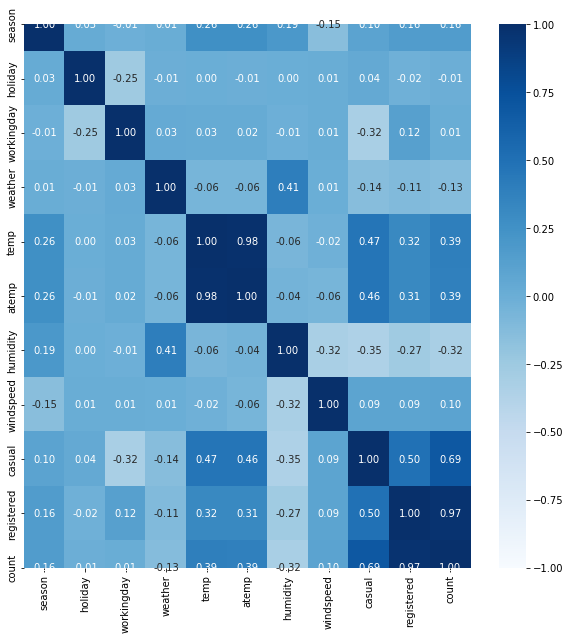

In [ ]:
corr_matrix = train.corr()
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="Blues")

#결측처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)

#관련변수
wind_rel_cols = ["season", "weather", "temp", "humidity", "windspeed"] #날씨와 관련있는 변수

#wind!=0 of train
train_wind1 = train[train["windspeed"]!=0]
#필요컬럼만
train_wind1_real = train_wind1[wind_rel_cols]
train_wind1_target = train_wind1_real["windspeed"] #y_train
train_wind1_features = train_wind1_real.drop(["windspeed"], axis=1) #x_train

#wind=0 of train
train_wind0 = train[train["windspeed"]==0]
#필요컬럼만
train_wind0_real = train_wind0[wind_rel_cols]
train_wind0_features = train_wind0_real.drop(["windspeed"], axis=1) #x_test


#wind!=0 of test
test_wind1 = test[test["windspeed"]!=0]

#wind=0 of test
test_wind0 = test[test["windspeed"]==0]
test_wind0_real = test_wind0[wind_rel_cols]
test_wind0_features = test_wind0_real.drop(["windspeed"], axis=1) #x_test of test

rf.fit(train_wind1_features, train_wind1_target)
train_pred = rf.predict(train_wind0_features)
test_pred = rf.predict(test_wind0_features)

In [ ]:
#windspeed 0인값 채우기
train_wind0["windspeed"] = train_pred
test_wind0["windspeed"] = test_pred

#windspeed !=0 인 애들과 붙이기
train = pd.concat([train_wind1, train_wind0], axis=0)
test = pd.concat([test_wind1, test_wind0], axis=0)

#정렬
train = train.sort_index()
test = test.sort_index()

train.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,7.193101,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,11.473343,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,11.473343,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,8.316451,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,8.316451,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.003200,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,11.473343,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,9.380391,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,8.316451,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,9.913467,8,6,14


#레이블링 및 더미처리


In [ ]:
#더미처리할 변수
dum_cols = ["season", "weather"]
train[dum_cols] = train[dum_cols].astype("category")
test[dum_cols] = test[dum_cols].astype("category")

train_dum = pd.get_dummies(train[dum_cols])
test_dum = pd.get_dummies(test[dum_cols])

train = pd.concat([train, train_dum], axis=1)
test = pd.concat([test, test_dum], axis=1)

train = train.drop(dum_cols, axis=1)
test = test.drop(dum_cols, axis=1)

train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.193101,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,11.473343,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,11.473343,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,8.316451,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,8.316451,0,1,1,1,0,0,0,1,0,0,0


#파생변수 생성

##날짜변환

In [ ]:
#datetime 날짜형 변환
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

#변수 추가
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["day_name"] = train["datetime"].dt.day_name()

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["day_name"] = test["datetime"].dt.day_name()

train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,day_name
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.193101,3,13,16,...,0,1,0,0,0,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,11.473343,8,32,40,...,0,1,0,0,0,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,11.473343,5,27,32,...,0,1,0,0,0,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,8.316451,3,10,13,...,0,1,0,0,0,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,8.316451,0,1,1,...,0,1,0,0,0,2011,1,1,4,Saturday


In [ ]:
#day_name 및 더미처리
train_dn_dum = pd.get_dummies(train["day_name"], prefix="day_name")
test_dn_dum = pd.get_dummies(test["day_name"], prefix="day_name")

train = pd.concat([train, train_dn_dum], axis=1)
test = pd.concat([test, test_dn_dum], axis=1)

train

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,day,hour,day_name,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.193101,3,13,16,...,1,0,Saturday,0,0,1,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,11.473343,8,32,40,...,1,1,Saturday,0,0,1,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,11.473343,5,27,32,...,1,2,Saturday,0,0,1,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,8.316451,3,10,13,...,1,3,Saturday,0,0,1,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,8.316451,0,1,1,...,1,4,Saturday,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.002700,7,329,336,...,19,19,Wednesday,0,0,0,0,0,0,1
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.001300,10,231,241,...,19,20,Wednesday,0,0,0,0,0,0,1
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.001300,4,164,168,...,19,21,Wednesday,0,0,0,0,0,0,1
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.003200,12,117,129,...,19,22,Wednesday,0,0,0,0,0,0,1


In [ ]:
#데이터프레임 재정의
train = train.drop(["day_name"], axis=1)
test = test.drop(["day_name"], axis=1)

train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month,day,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.193101,3,13,16,...,1,1,0,0,0,1,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,11.473343,8,32,40,...,1,1,1,0,0,1,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,11.473343,5,27,32,...,1,1,2,0,0,1,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,8.316451,3,10,13,...,1,1,3,0,0,1,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,8.316451,0,1,1,...,1,1,4,0,0,1,0,0,0,0


##PCA(temp, atemp)

In [ ]:
#vif확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_cols = ["temp", "atemp", "humidity", "windspeed"]
vif_values = train[vif_cols]
vif = [variance_inflation_factor(vif_values.values, i) for i in range(vif_values.shape[1])]

vif_df = pd.DataFrame()
vif_df["features"] = vif_cols
vif_df["vif"] = vif

vif_df

,features,vif
0,temp,261.210927
1,atemp,284.964898
2,humidity,5.915013
3,windspeed,3.701661


In [ ]:
#temp, atemp의 vif >= 10 이상이므로 pca 실행
from sklearn.decomposition import PCA

#차원축소
pca=PCA(n_components=1)
pca.fit(train[['temp', 'atemp']])

#두 변수를 한 변수로 합쳤을때 원래 정보의 몇%를 보존할 수 있는지
print("보존할 수 있는 정보:", pca.explained_variance_ratio_*100)

#pca변수추가
train["temp_atemp_pca"] = pca.transform(train[["temp", "atemp"]])
test["temp_atemp_pca"] = pca.transform(test[["temp", "atemp"]])

train.head()

보존할 수 있는 정보: [99.25273466]


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,day,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,temp_atemp_pca
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,7.193101,3,13,16,...,1,0,0,0,1,0,0,0,0,13.848653
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,11.473343,8,32,40,...,1,1,0,0,1,0,0,0,0,14.963061
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,11.473343,5,27,32,...,1,2,0,0,1,0,0,0,0,14.963061
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,8.316451,3,10,13,...,1,3,0,0,1,0,0,0,0,13.848653
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,8.316451,0,1,1,...,1,4,0,0,1,0,0,0,0,13.848653


##target변수 로그변환

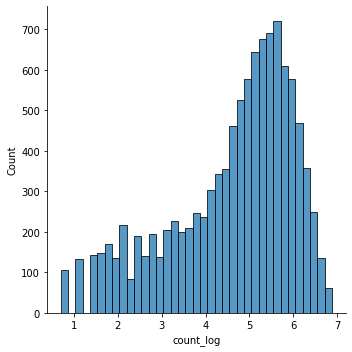

In [ ]:
train["count_log"] = np.log1p(train["count"])
sns.displot(train["count_log"])

In [ ]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'year', 'month', 'day', 'hour', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'temp_atemp_pca', 'count_log'],
      dtype='object')

In [ ]:
train_drop_cols = ["datetime", "temp", "atemp", "casual", "registered", "count", "year", "day", "month"]
test_drop_cols = ["datetime", "temp", "atemp", "year", "day", "month"]

train_df = train.drop(train_drop_cols, axis=1)
test_df = test.drop(test_drop_cols, axis=1)

train_df.head()

,holiday,workingday,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,...,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,temp_atemp_pca,count_log
0,0,0,81,7.193101,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,13.848653,2.833213
1,0,0,80,11.473343,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,14.963061,3.713572
2,0,0,80,11.473343,1,0,0,0,1,0,...,2,0,0,1,0,0,0,0,14.963061,3.496508
3,0,0,75,8.316451,1,0,0,0,1,0,...,3,0,0,1,0,0,0,0,13.848653,2.639057
4,0,0,75,8.316451,1,0,0,0,1,0,...,4,0,0,1,0,0,0,0,13.848653,0.693147


In [ ]:
train = train_df.copy()
test = test_df.copy()

print(train.shape)
print(test.shape)

(10886, 22)
(6493, 21)


#상관관계 다시 확인

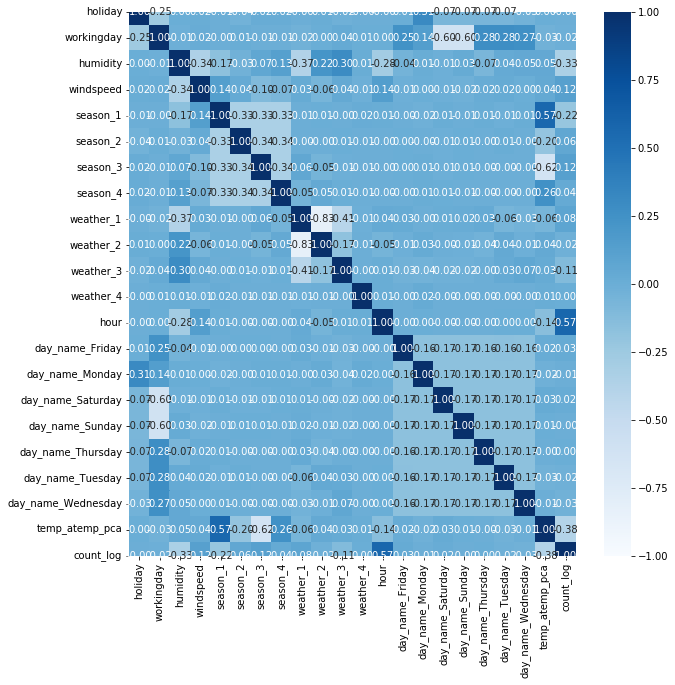

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="Blues");

In [ ]:
pd.set_option('display.max_columns', None) # 전체 열 보기

In [ ]:
train.head()

,holiday,workingday,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,temp_atemp_pca,count_log
0,0,0,81,7.193101,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,13.848653,2.833213
1,0,0,80,11.473343,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,14.963061,3.713572
2,0,0,80,11.473343,1,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,14.963061,3.496508
3,0,0,75,8.316451,1,0,0,0,1,0,0,0,3,0,0,1,0,0,0,0,13.848653,2.639057
4,0,0,75,8.316451,1,0,0,0,1,0,0,0,4,0,0,1,0,0,0,0,13.848653,0.693147


#스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["humidity", "windspeed", "temp_atemp_pca"]
ss = StandardScaler()
ss.fit(train[scale_cols])

train[scale_cols] = ss.transform(train[scale_cols])
test[scale_cols] = ss.transform(test[scale_cols])

train.head()

,holiday,workingday,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,temp_atemp_pca,count_log
0,0,0,0.993213,-1.041464,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.207544,2.833213
1,0,0,0.941249,-0.414336,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1.304715,3.713572
2,0,0,0.941249,-0.414336,1,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,1.304715,3.496508
3,0,0,0.681430,-0.876874,1,0,0,0,1,0,0,0,3,0,0,1,0,0,0,0,1.207544,2.639057
4,0,0,0.681430,-0.876874,1,0,0,0,1,0,0,0,4,0,0,1,0,0,0,0,1.207544,0.693147


#데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(["count_log"], axis=1)
y = train["count_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#모델링

In [ ]:
def rmsle_score(preds, true):
  rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
  return rmsle_score

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

model1 = RandomForestRegressor(n_estimators=100, random_state=1)

model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred1))
rmsle = np.sqrt(mean_squared_log_error(y_test, pred1))
print(rmse)
print(rmsle)

0.3872033207499565
0.0979022790962706


#평가 확인

In [ ]:
print(np.expm1(rmse))
print(np.expm1(rmsle))

0.4728559230026047
0.10285500785449814


#피쳐중요도 확인

In [ ]:
len(model1.feature_importances_)

21

In [ ]:
len(X_train.columns)

21

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([12, 20,  1,  2,  3,  4,  7, 10, 13, 16, 14,  8, 19,  5, 15, 17,  9,
       18,  0,  6, 11])

In [ ]:
importances[indices]

array([7.62525980e-01, 7.86347881e-02, 5.03838310e-02, 3.18144447e-02,
       1.71837830e-02, 1.47675457e-02, 1.03613091e-02, 8.79837512e-03,
       4.12987307e-03, 3.31559742e-03, 2.55374946e-03, 2.09405495e-03,
       2.05141670e-03, 2.04581850e-03, 1.83972704e-03, 1.74263115e-03,
       1.58919321e-03, 1.57077164e-03, 1.45793692e-03, 1.13915257e-03,
       2.06286127e-08])

[Feature Importance Ranking]
1. hour: 0.76253
2. temp_atemp_pca: 0.07863
3. workingday: 0.05038
4. humidity: 0.03181
5. windspeed: 0.01718
6. season_1: 0.01477
7. season_4: 0.01036
8. weather_3: 0.00880
9. day_name_Friday: 0.00413
10. day_name_Sunday: 0.00332
11. day_name_Monday: 0.00255
12. weather_1: 0.00209
13. day_name_Wednesday: 0.00205
14. season_2: 0.00205
15. day_name_Saturday: 0.00184
16. day_name_Thursday: 0.00174
17. weather_2: 0.00159
18. day_name_Tuesday: 0.00157
19. holiday: 0.00146
20. season_3: 0.00114
21. weather_4: 0.00000


Text(0, 0.5, 'columns')

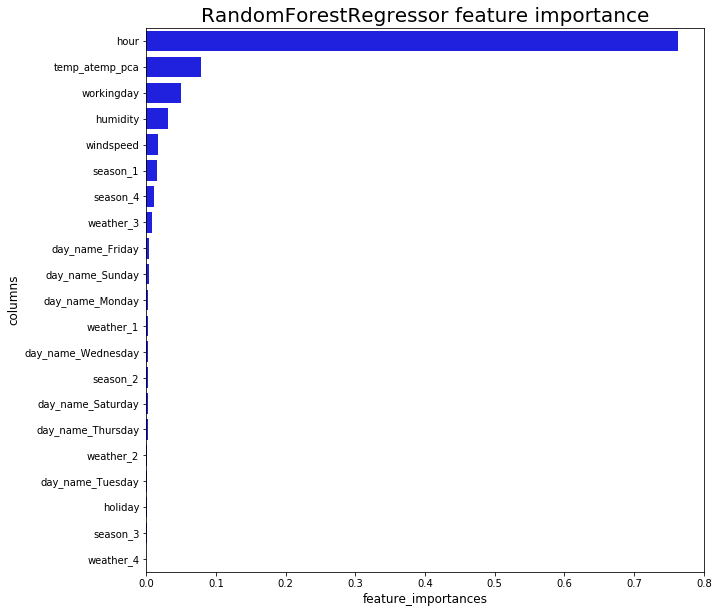

In [ ]:
print("[Feature Importance Ranking]")

for i in range(len(importances)):
  print(f"{i+1}. {X_train.columns[indices][i]}: {importances[indices][i]:.5f}")

plt.figure(figsize=(10, 10))
sns.barplot(x=importances[indices], y=X_train.columns[indices], color="blue")
plt.title("RandomForestRegressor feature importance", size=20)
plt.xlabel("feature_importances", fontsize=12)
plt.ylabel("columns", fontsize=12)

#부분의존도 확인(feature와 target의 관계)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(model1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, top=10, feature_names=list(X_test))

Weight,Feature
1.4506 ± 0.0689,hour
0.2007 ± 0.0196,workingday
0.1318 ± 0.0113,temp_atemp_pca
0.0331 ± 0.0024,humidity
0.0142 ± 0.0037,season_4
0.0123 ± 0.0020,season_1
0.0074 ± 0.0023,weather_3
0.0066 ± 0.0012,day_name_Friday
0.0038 ± 0.0005,day_name_Sunday
0.0036 ± 0.0008,windspeed


In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from pdpbox import pdp

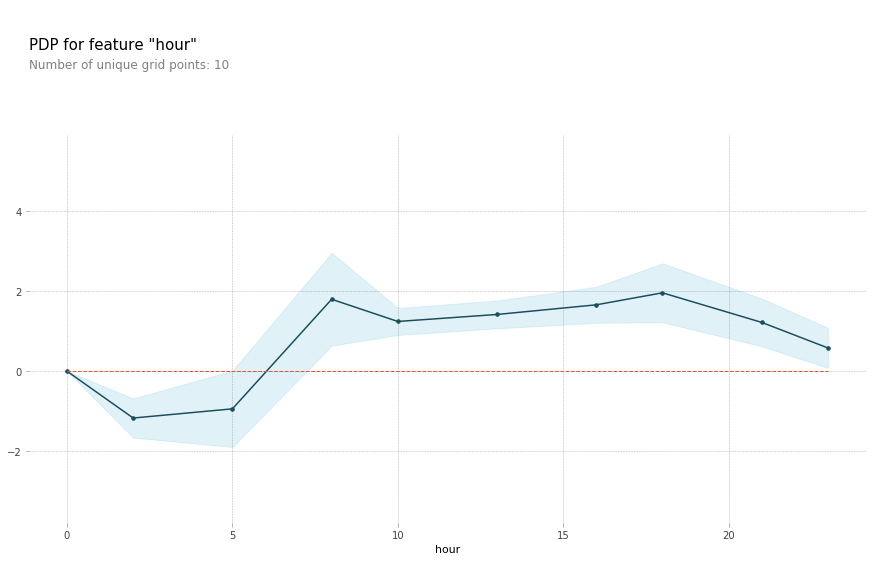

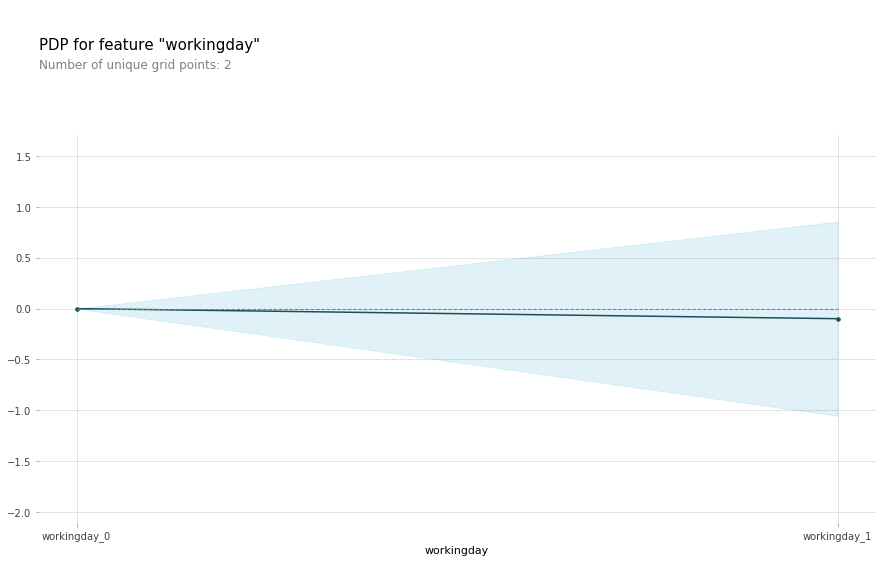

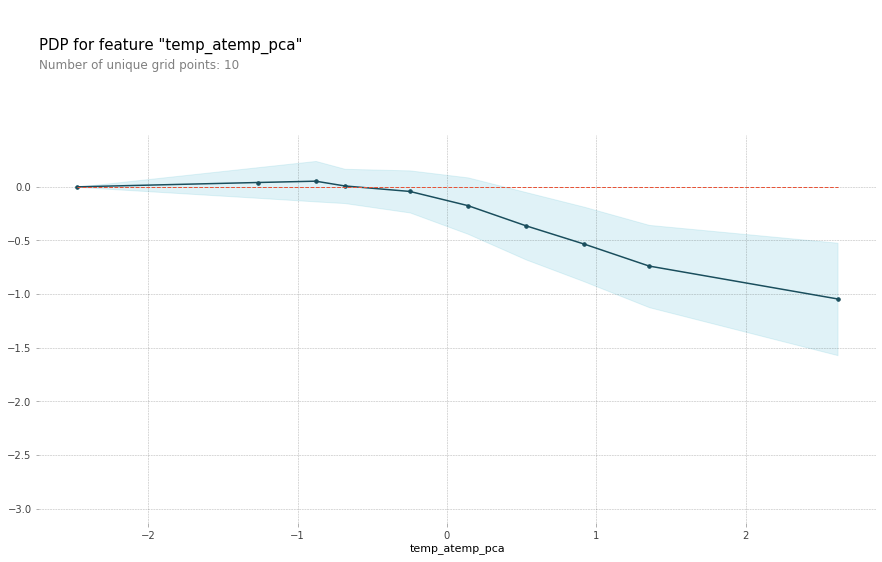

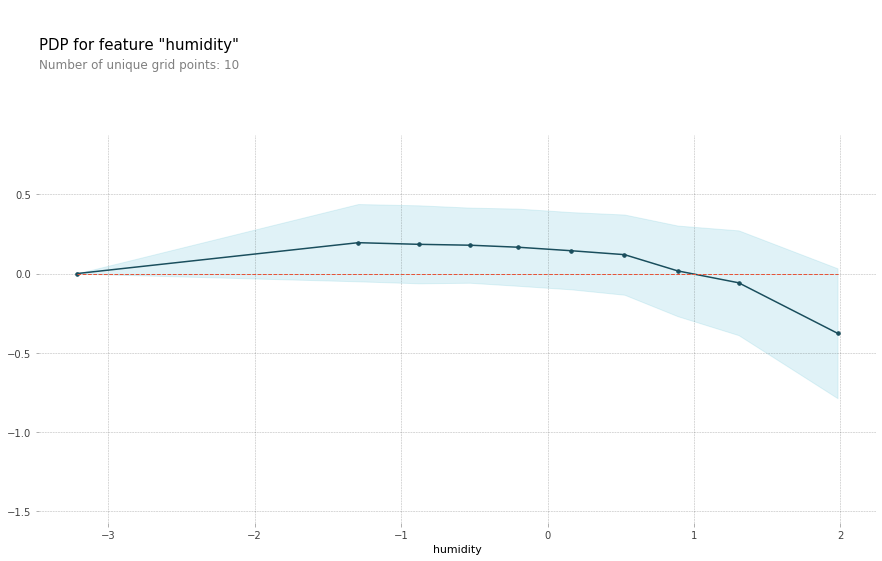

In [ ]:
features = ["hour", "workingday", "temp_atemp_pca", "humidity"]
for feature in features:
  pdp_dist = pdp.pdp_isolate(model=model1, dataset=X_test,
                             model_features=list(X_test), feature=feature)
  pdp.pdp_plot(pdp_dist, feature)
  plt.show()

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f957e3f7850>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f957e37e110>})

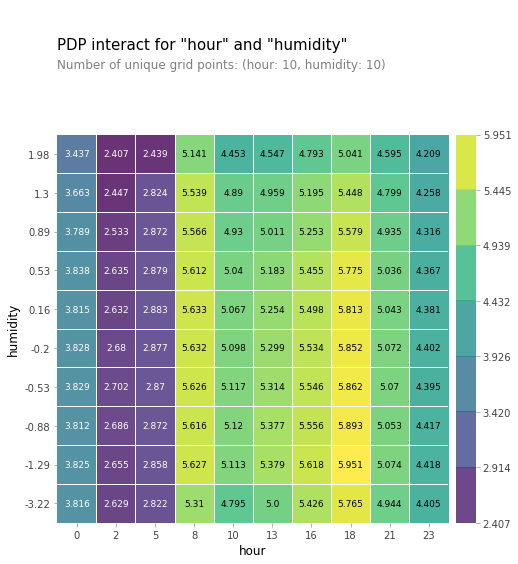

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# features = ["hour", "workingday", "temp_atemp_pca", "humidity"]
features = ["hour", "humidity"]
interaction = pdp_interact(model=model1,
                           dataset=X_test,
                           model_features=list(X_test),
                           features=features)
pdp_interact_plot(interaction,
                  plot_type="grid",
                  feature_names=features)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f957e745bd0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f957e13c610>})

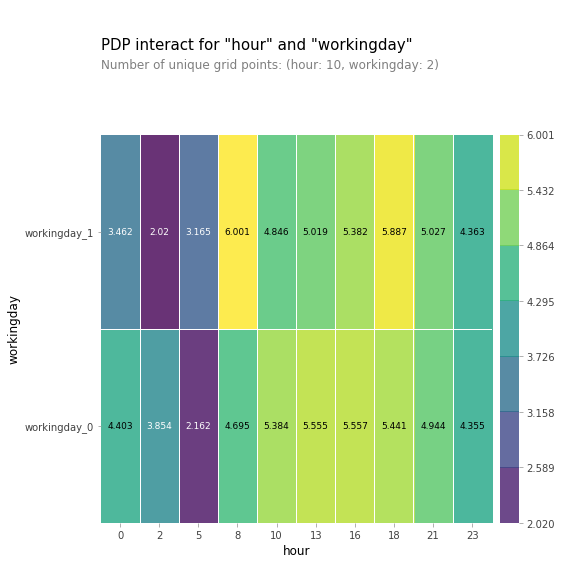

In [ ]:
#working day와 hour의 Partialplot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ["hour", "workingday"]
interaction = pdp_interact(model=model1,
                           dataset=X_test,
                           model_features=X_test.columns,
                           features=features)
pdp_interact_plot(interaction,
                  plot_type="grid", 
                  feature_names=features)